In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')#忽略一些警告

# plt.rcParams['font.sans-serif']=['SimHei']
# plt.rcParams['axes.unicode_minus']=False

# 导入数据

In [3]:
#加载训练集数据
train=pd.read_csv("data/train.csv")
# test=pd.read_csv("data/test.csv")
train.head()

,时间,小区名,小区房屋出租数量,楼层,总楼层,房屋面积,房屋朝向,居住状态,卧室数量,厅的数量,卫的数量,出租方式,区,位置,地铁线路,地铁站点,距离,装修情况,月租金
0,1,3072,0.128906,2,0.236364,0.008628,东南,NaN,1,1,1,NaN,11.0,118.0,2.0,40.0,0.764167,NaN,5.602716
1,1,3152,0.132812,1,0.381818,0.017046,东,NaN,1,0,0,NaN,10.0,100.0,4.0,58.0,0.709167,NaN,16.977929
2,1,5575,0.042969,0,0.290909,0.010593,东南,NaN,2,1,2,NaN,12.0,130.0,5.0,37.0,0.572500,NaN,8.998302
3,1,3103,0.085938,2,0.581818,0.019199,南,NaN,3,2,2,NaN,7.0,90.0,2.0,63.0,0.658333,NaN,5.602716
4,1,5182,0.214844,0,0.545455,0.010427,东北,NaN,2,1,1,NaN,3.0,31.0,NaN,NaN,NaN,NaN,7.300509


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196539 entries, 0 to 196538
Data columns (total 19 columns):
时间          196539 non-null int64
小区名         196539 non-null int64
小区房屋出租数量    195538 non-null float64
楼层          196539 non-null int64
总楼层         196539 non-null float64
房屋面积        196539 non-null float64
房屋朝向        196539 non-null object
居住状态        20138 non-null float64
卧室数量        196539 non-null int64
厅的数量        196539 non-null int64
卫的数量        196539 non-null int64
出租方式        24230 non-null float64
区           196508 non-null float64
位置          196508 non-null float64
地铁线路        91778 non-null float64
地铁站点        91778 non-null float64
距离          91778 non-null float64
装修情况        18492 non-null float64
月租金         196539 non-null float64
dtypes: float64(12), int64(6), object(1)
memory usage: 28.5+ MB


In [5]:
train.describe()

,时间,小区名,小区房屋出租数量,楼层,总楼层,房屋面积,居住状态,卧室数量,厅的数量,卫的数量,出租方式,区,位置,地铁线路,地铁站点,距离,装修情况,月租金
count,196539.000000,196539.000000,195538.000000,196539.000000,196539.000000,196539.000000,20138.000000,196539.000000,196539.000000,196539.000000,24230.000000,196508.000000,196508.000000,91778.000000,91778.000000,91778.000000,18492.000000,196539.000000
mean,2.115229,3224.116562,0.124151,0.955449,0.408711,0.013139,2.725196,2.236635,1.299625,1.223818,0.900289,7.905139,67.945982,3.284850,57.493735,0.551202,3.589228,7.949313
std,0.786980,2023.073726,0.133299,0.851511,0.183100,0.008104,0.667763,0.896961,0.613169,0.487234,0.299621,4.025696,43.522394,1.477147,35.191414,0.247268,1.996912,6.310609
min,1.000000,0.000000,0.007812,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.001667,1.000000,0.000000
25%,1.000000,1388.000000,0.039062,0.000000,0.290909,0.009268,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,33.000000,2.000000,23.000000,0.356667,2.000000,4.923599
50%,2.000000,3086.000000,0.082031,1.000000,0.418182,0.012910,3.000000,2.000000,1.000000,1.000000,1.000000,9.000000,61.000000,4.000000,59.000000,0.554167,2.000000,6.621392
75%,3.000000,5199.000000,0.160156,2.000000,0.563636,0.014896,3.000000,3.000000,2.000000,1.000000,1.000000,11.000000,103.000000,5.000000,87.000000,0.745833,6.000000,8.998302
max,3.000000,6627.000000,1.000000,2.000000,1.000000,1.000000,3.000000,11.000000,8.000000,8.000000,1.000000,14.000000,152.000000,5.000000,119.000000,1.000000,6.000000,100.000000


# 数据探索

## 基本信息

In [6]:
train.head()

,时间,小区名,小区房屋出租数量,楼层,总楼层,房屋面积,房屋朝向,居住状态,卧室数量,厅的数量,卫的数量,出租方式,区,位置,地铁线路,地铁站点,距离,装修情况,月租金
0,1,3072,0.128906,2,0.236364,0.008628,东南,NaN,1,1,1,NaN,11.0,118.0,2.0,40.0,0.764167,NaN,5.602716
1,1,3152,0.132812,1,0.381818,0.017046,东,NaN,1,0,0,NaN,10.0,100.0,4.0,58.0,0.709167,NaN,16.977929
2,1,5575,0.042969,0,0.290909,0.010593,东南,NaN,2,1,2,NaN,12.0,130.0,5.0,37.0,0.572500,NaN,8.998302
3,1,3103,0.085938,2,0.581818,0.019199,南,NaN,3,2,2,NaN,7.0,90.0,2.0,63.0,0.658333,NaN,5.602716
4,1,5182,0.214844,0,0.545455,0.010427,东北,NaN,2,1,1,NaN,3.0,31.0,NaN,NaN,NaN,NaN,7.300509


## 缺失值比例

In [4]:
# 每列的缺失值个数/总行数
train_missing = (train.isnull().sum()/len(train))*100
#去掉缺失比例为0的列
train_missing = train_missing.drop(train_missing[train_missing==0].index).sort_values(ascending=False)
miss_data = pd.DataFrame({'缺失百分比':train_missing})
miss_data

,缺失百分比
装修情况,90.591180
居住状态,89.753688
出租方式,87.671658
距离,53.302907
地铁站点,53.302907
地铁线路,53.302907
小区房屋出租数量,0.509314
位置,0.015773
区,0.015773


## 目标值分布

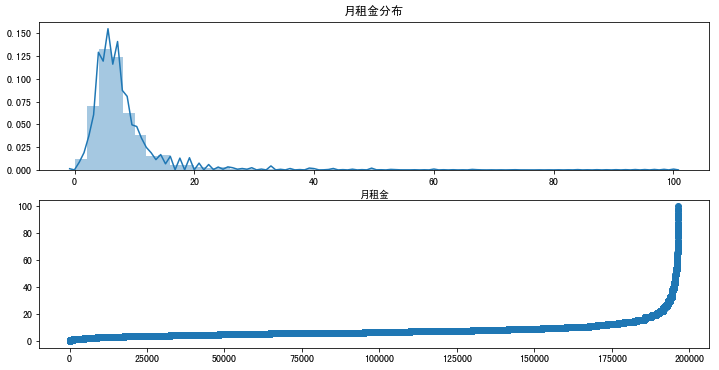

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(211)
plt.title('月租金分布')
sns.distplot(train['月租金'])#价格的数量分布曲线
plt.subplot(212)
plt.scatter(range(train.shape[0]),np.sort(train['月租金'].values))
plt.show()

## 所有特征分布

### 直方图和柱状分布图

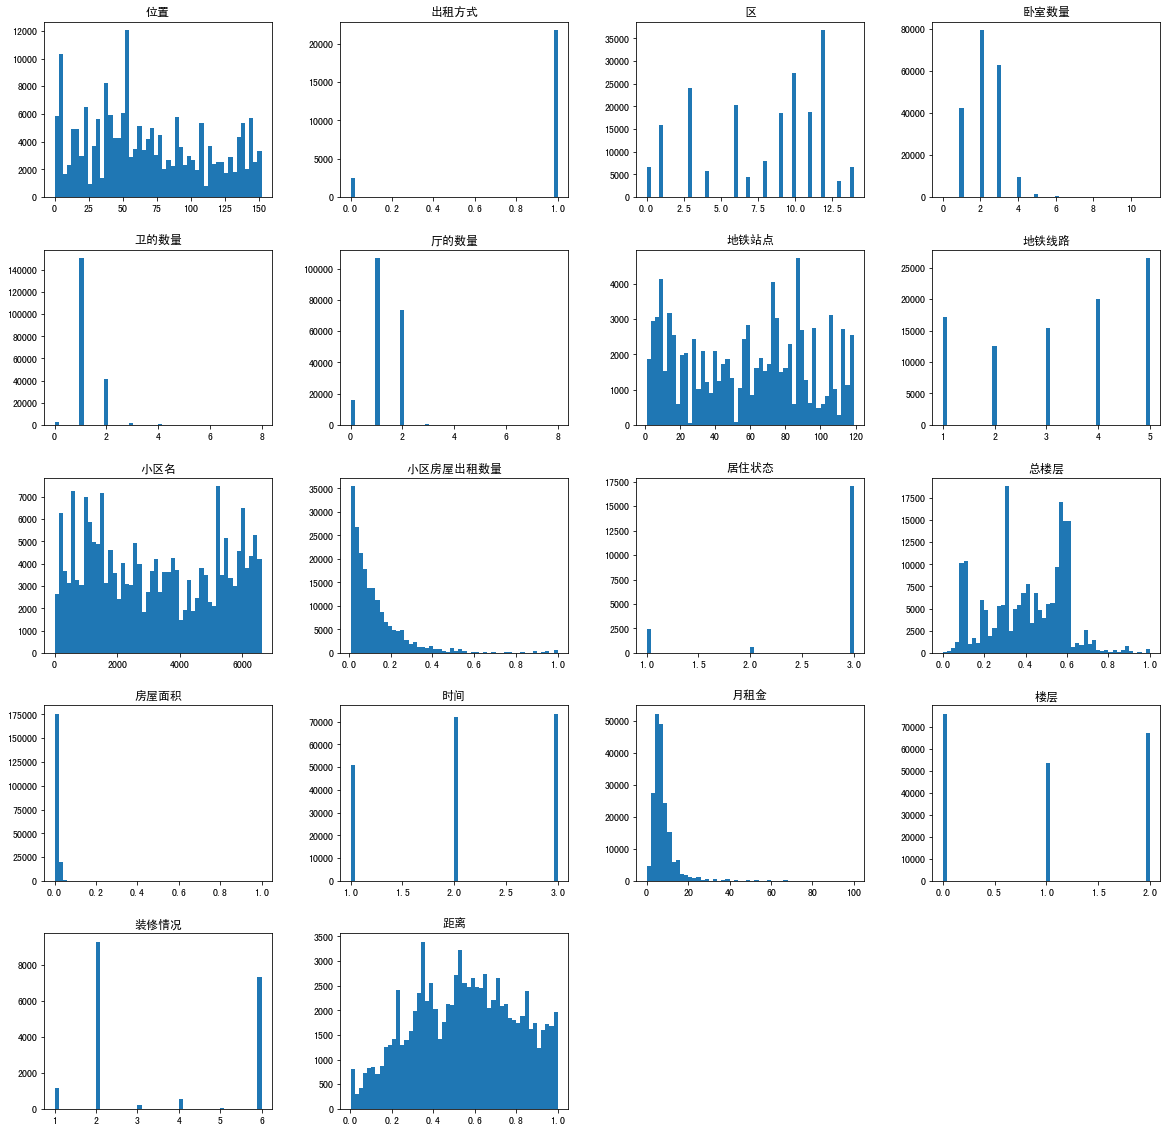

In [9]:
train.hist(figsize=(20,20),bins=50,grid=False)
plt.show()

## 相关性分析

### 连续特征和目标值的散点图

In [10]:
train.columns

Index(['时间', '小区名', '小区房屋出租数量', '楼层', '总楼层', '房屋面积', '房屋朝向', '居住状态', '卧室数量',
       '厅的数量', '卫的数量', '出租方式', '区', '位置', '地铁线路', '地铁站点', '距离', '装修情况', '月租金'],
      dtype='object')

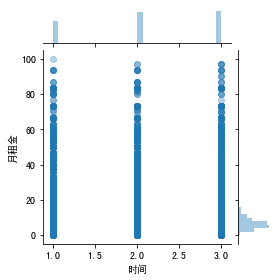

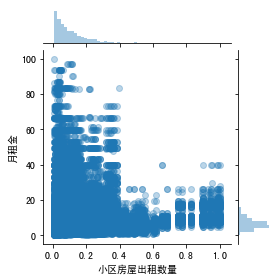

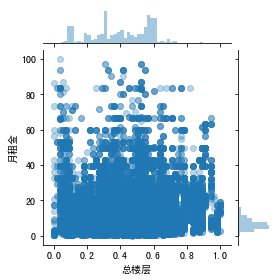

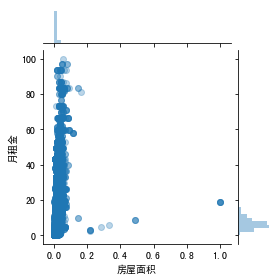

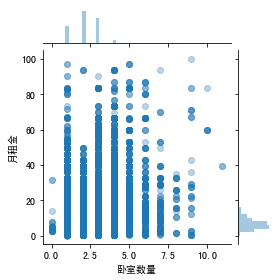

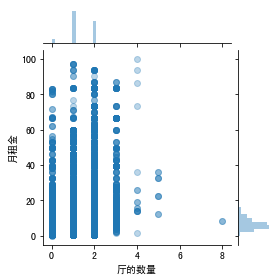

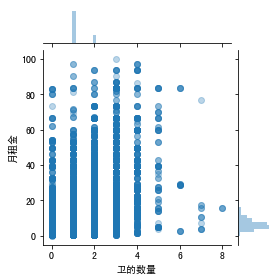

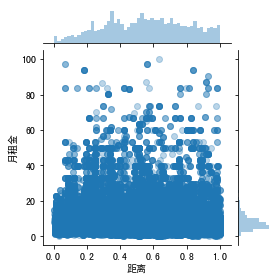

In [11]:
#通过散点图观察特征和目标值之间的关系
continuous_cols=['时间','小区房屋出租数量', '总楼层','房屋面积',  '卧室数量',
       '厅的数量', '卫的数量', '距离']
for col in continuous_cols:
    sns.jointplot(x=col,y='月租金',data=train,alpha=0.3,size=4)

### 特征和目标相关性分析

### 皮尔森相关性热力图

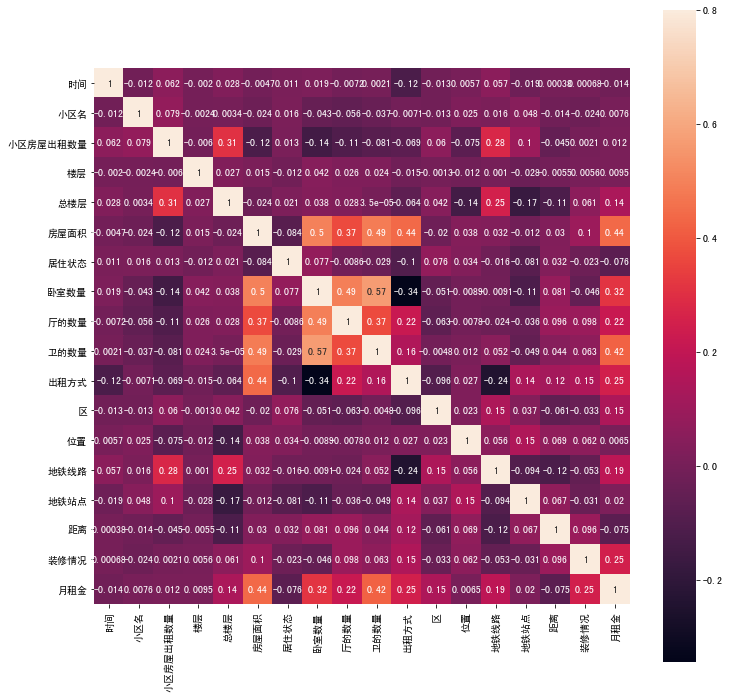

In [12]:
columns=['时间', '小区名', '小区房屋出租数量', '楼层', '总楼层', '房屋面积', '房屋朝向', '居住状态', '卧室数量',
       '厅的数量', '卫的数量', '出租方式', '区', '位置', '地铁线路', '地铁站点', '距离', '装修情况', '月租金']
corrmat = train.corr()#计算皮尔森相关性
plt.figure(figsize=(12,12))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

### 皮尔森相关

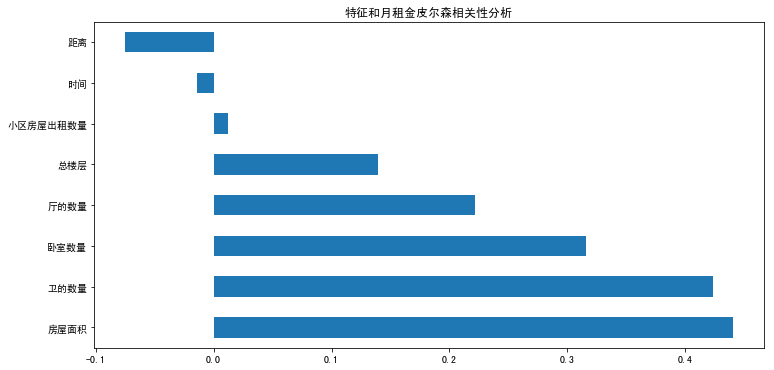

In [13]:
plt.figure(figsize=(12,6))
train.corr()['月租金'][continuous_cols].sort_values(ascending=False).plot(
    'barh',figsize=(12,6),title='特征和月租金皮尔森相关性分析'
)
plt.show()

### 斯皮尔曼相关

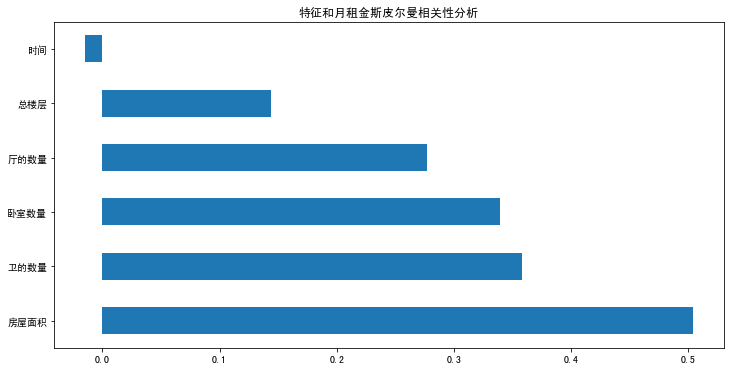

In [14]:
from scipy.stats import spearmanr
rs=[]
for key in continuous_cols:
    r,p=spearmanr(train[key],train['月租金']) #计算特征与目标值之间的斯皮尔曼相关性
    rs.append(r)
rs=pd.Series(data=rs,index=continuous_cols).dropna()
rs.sort_values(ascending=False).plot(
    'barh',figsize=(12,6),title='特征和月租金斯皮尔曼相关性分析'
)
plt.show()

### 离散特征和月租金关系分析
### 均值比较

In [15]:
import math
#负责绘制每个特征不同组的月租金均值图
def plot(names,ylabel,data,cols=3):
    n=len(data)
    rows=math.ceil(n/cols)
    fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(20,rows*8))
    for i in range(n):
        x=range(data[i].shape[0])
        y=data[i].values
        xticks=data[i].index
        r=i//cols
        c=i%cols
        ax[r][c].bar(x,y)
        ax[r][c].set_xticks(x)
        ax[r][c].set_xticklabels(xticks)
        ax[r][c].set_xlabel(names[i])
        ax[r][c].set_ylabel(ylabel)
        ax[r][c].set_title(names[i]+str(i)+ylabel+"均值比较")
    plt.show()  

In [16]:

category_cols=['时间','小区名','楼层',  '房屋朝向', '居住状态', 
       '出租方式', '区', '位置', '地铁线路', '地铁站点', '装修情况']
means=[]        
for key in category_cols:
    means.append(train.groupby(key)['月租金'].mean())


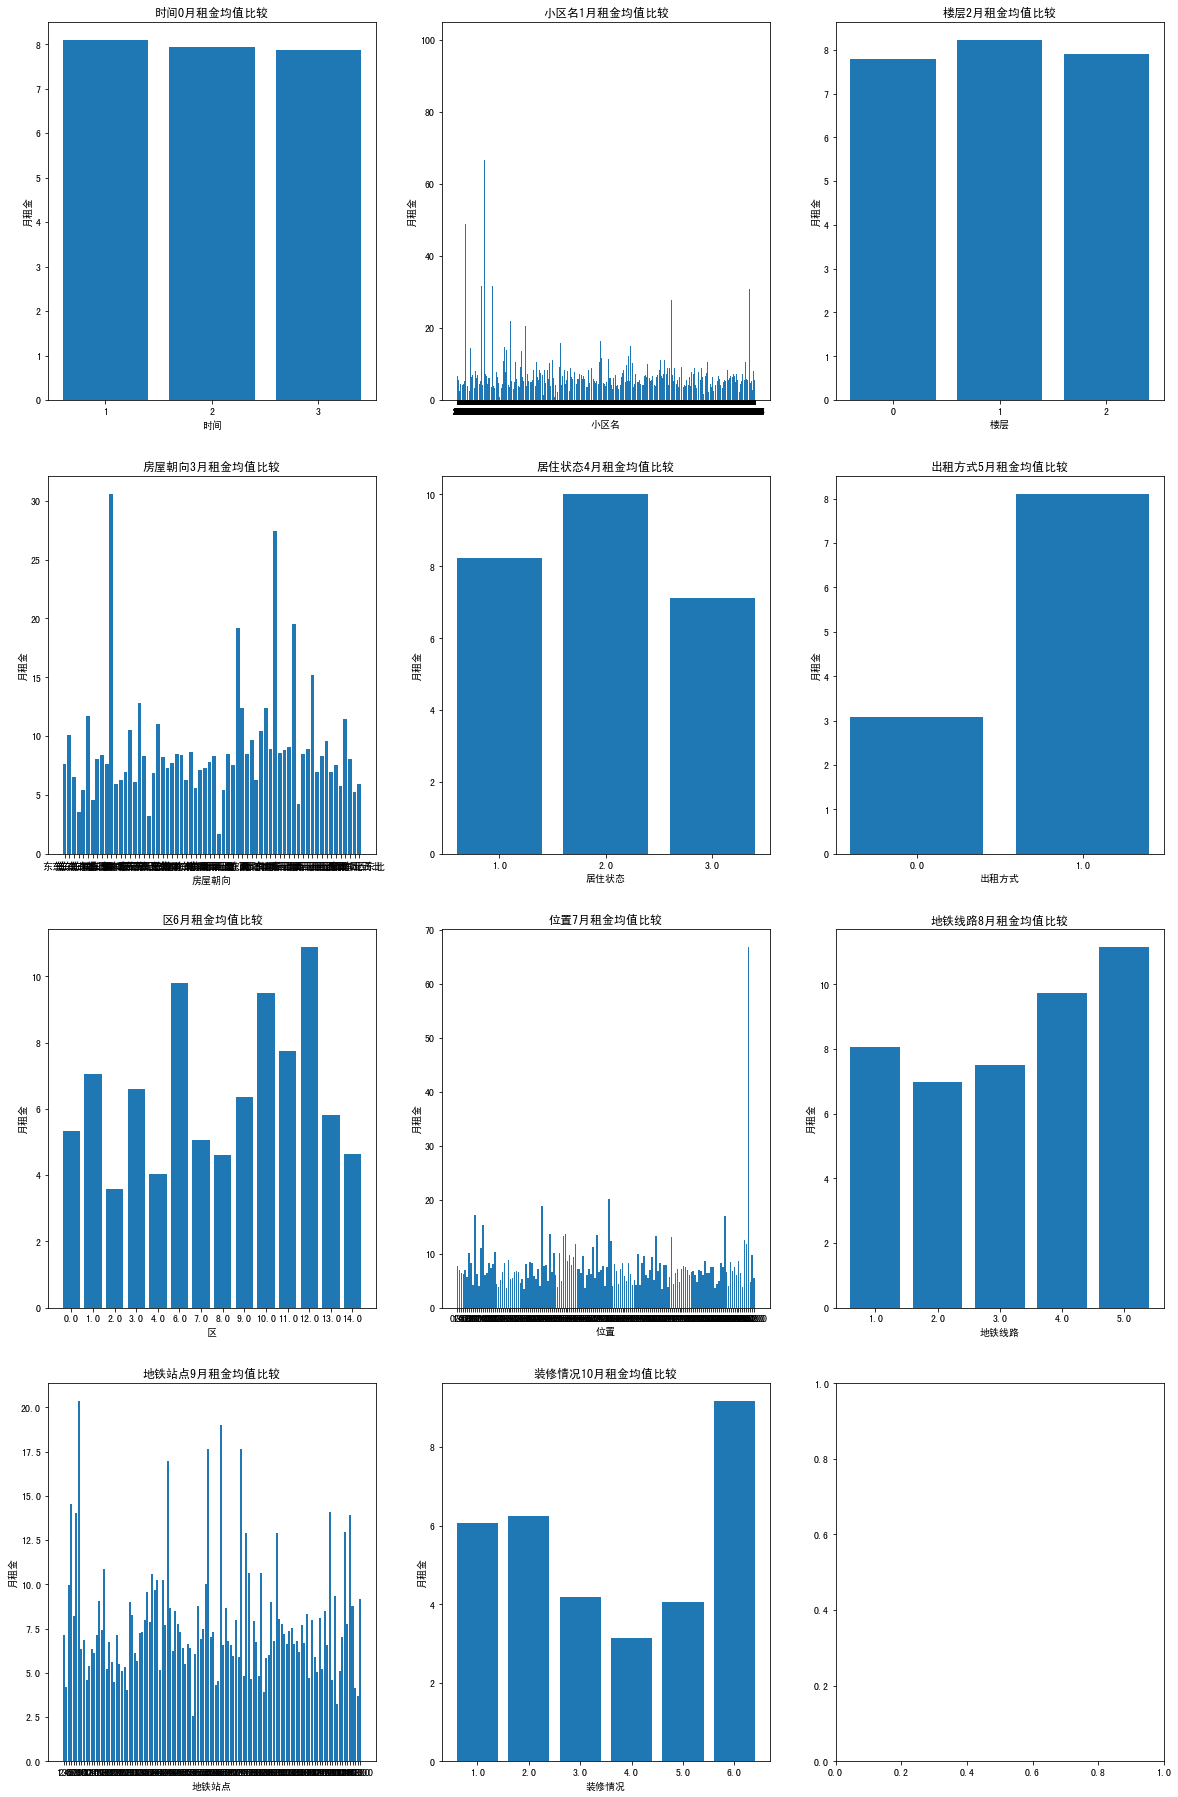

In [17]:
plot(category_cols,"月租金",means)

### 绘制箱线图

In [18]:
def plot_box(names,x,data,cols=1):
    n=len(names)
    for i in range(n):
        plt.figure(figsize=(12,10))
        sns.boxplot(y=names[i],x=x,data=data,orient='h')#绘制箱线图
        plt.show()

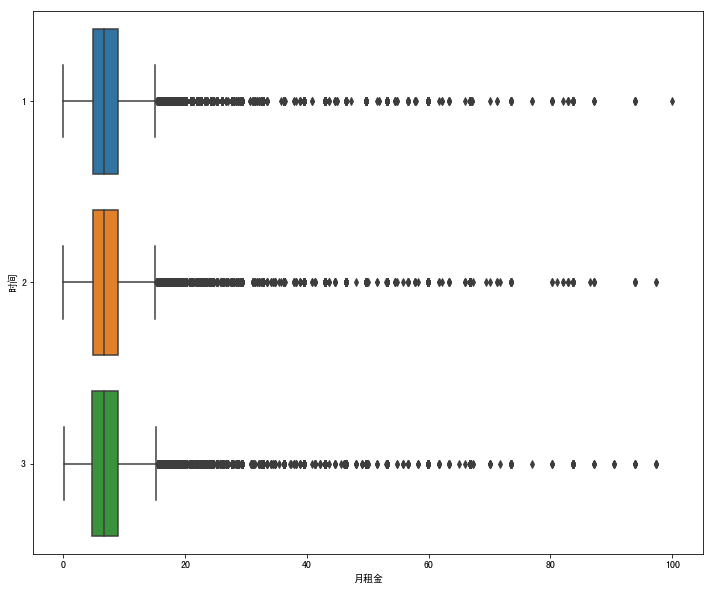

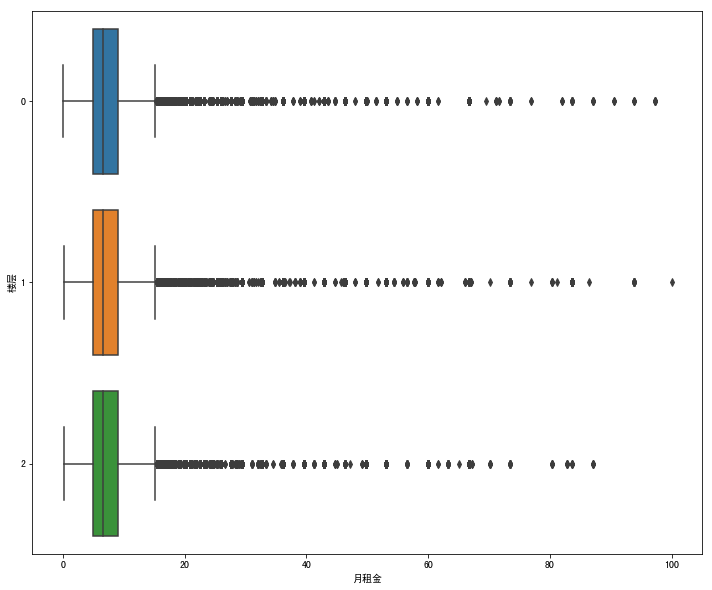

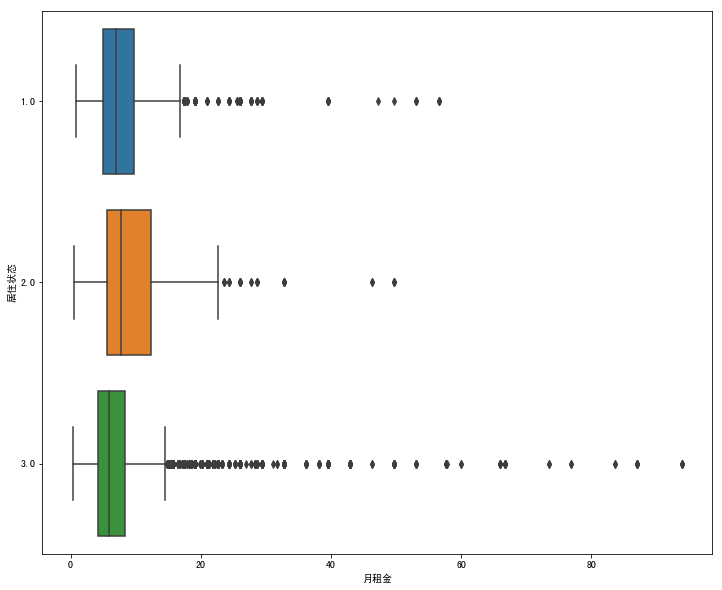

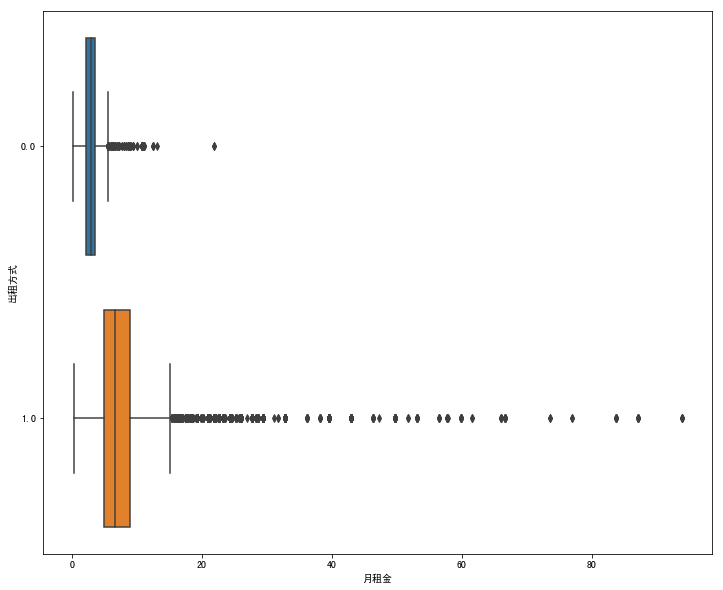

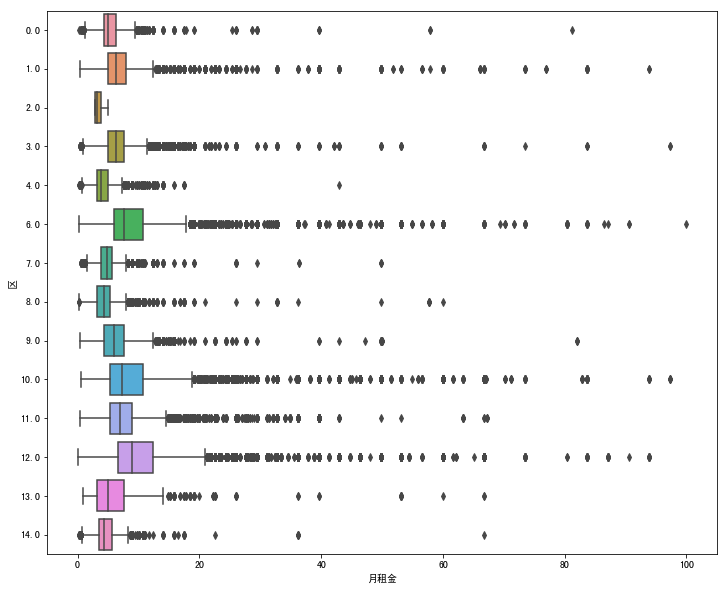

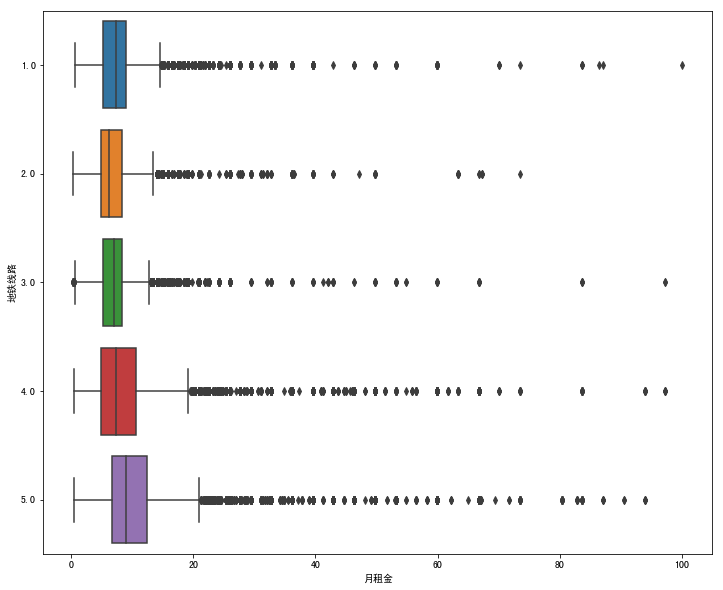

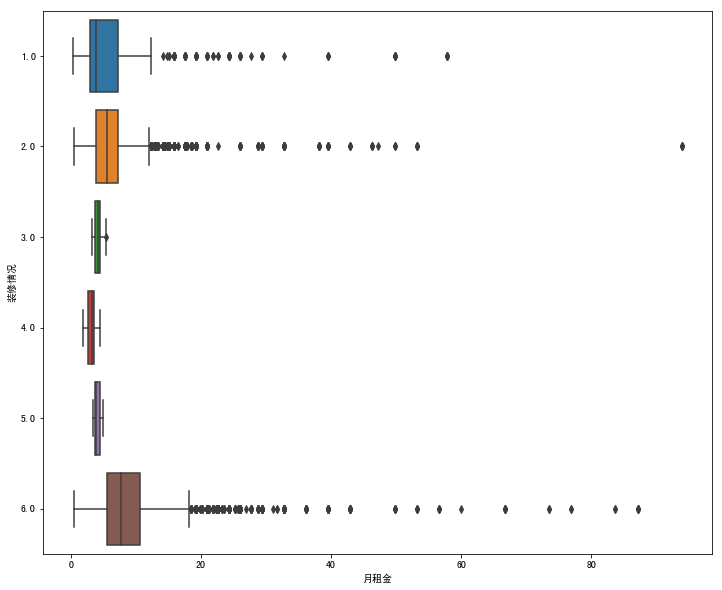

In [19]:
category_cols2=['时间','楼层', '居住状态', 
       '出租方式', '区',  '地铁线路',  '装修情况']
plot_box(category_cols2,"月租金",train)

## 异常值分析
这里我们主要分析跟月租金相关性较大的房屋面积的异常值

In [20]:
def plot_reg(xs,y,data,cols=1):
    n=len(xs)
    for i in range(n):
        plt.figure(figsize=(10,10))
        sns.regplot(x=data[xs[i]],y=data[y])
        plt.show()

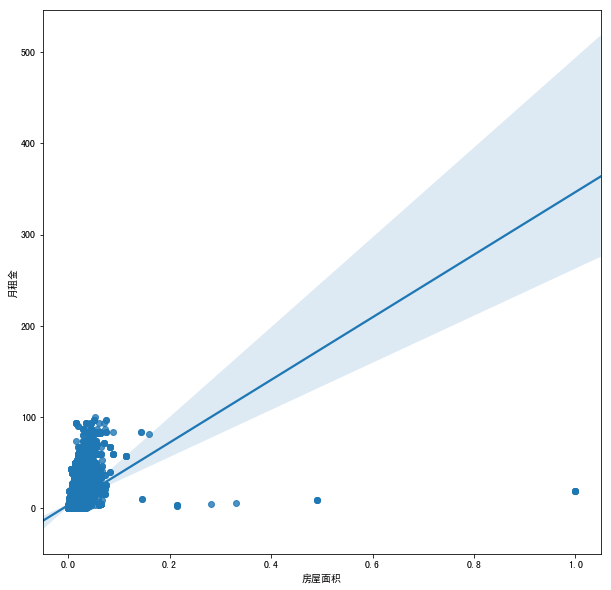

In [21]:
reg_cols=['房屋面积']
plot_reg(reg_cols,"月租金",train)

## 问题数据
### 房间朝向列有多个值

In [22]:
train['房屋朝向'].value_counts()

南            54770
东南           54359
东            31962
西南           17470
北            10428
             ...  
东南 南 西南 西        1
东 西南 北           1
东南 西 北           1
南 西南 西 西北        1
西南 西 东北          1
Name: 房屋朝向, Length: 64, dtype: int64

In [24]:
def split(text,i):
    """
    实现对字符串进行分割,并取出结果中下标i对应的值
    """
    items=text.split(" ")
    if i<len(items):
        return items[i]
    else:
        return np.nan
for i in range(5):
    train['朝向_'+str(i)]=train['房屋朝向'].map(lambda x:split(x,i))

# train['房屋地铁站点朝向'].map(lambda x:x.split(" ")).map(lambda x:len(x)).max()

In [ ]:
names=["朝向_{}".format(i) for i in range(5)]
train[names].info()

### 同一个小区属于不同的区

In [25]:
train.columns

Index(['时间', '小区名', '小区房屋出租数量', '楼层', '总楼层', '房屋面积', '房屋朝向', '居住状态', '卧室数量',
       '厅的数量', '卫的数量', '出租方式', '区', '位置', '地铁线路', '地铁站点', '距离', '装修情况', '月租金',
       '朝向_0', '朝向_1', '朝向_2', '朝向_3', '朝向_4'],
      dtype='object')

In [26]:
#去掉'小区名','区','位置'三个列重复之后  有5578个不重复值
neighbors1=train[['小区名','区','位置']]
neighbors1.shape

(196539, 3)

In [27]:
#去掉'小区名','区','位置'三个列重复之后  有5577个不重复值
neighbors1=train[['小区名','位置']].drop_duplicates().dropna()
neighbors1.shape

(5577, 2)

In [28]:
#而有位置的小区名只有5547个不重复值  说明有31个小区位于不同的位置
train[train['位置'].notnull()].drop_duplicates(['小区名']).shape

(5546, 24)

In [29]:
#neighbors1按照小区名分组后保留分组条数大于1的小区名
count=neighbors1.groupby('小区名')['位置'].count()
ids=count[count>1].index
ids

Int64Index([ 284,  385,  418,  701,  783, 1455, 1870, 2228, 2468, 2513, 2611,
            2916, 3183, 3268, 3482, 3645, 3967, 4054, 4071, 4471, 4767, 4859,
            5320, 5699, 5844, 5968, 6020, 6122, 6515, 6626, 6627],
           dtype='int64', name='小区名')

In [30]:
#在原数据中筛选出这些小区的信息
neighbors_has_problem=train[['小区名','位置']][train['小区名'].isin(ids)].sort_values(by='小区名')
neighbors_has_problem

,小区名,位置
105800,284,102.0
105988,284,102.0
105228,284,102.0
105076,284,102.0
105074,284,102.0
...,...,...
131530,6627,86.0
158621,6627,136.0
56569,6627,86.0
39956,6627,86.0


In [31]:
#找到每个小区的位置众数
#这里要注意x.mode有可能返回多个众数，所以用一个np.max拿到最值最大的众数作为最终的结果
position_mode_of_neighbors=neighbors_has_problem.groupby('小区名').apply(lambda x:np.max(x['位置'].mode()))
#位置缺失值就用这个数据来进行填充，对于已有的一个小区位于不同的位置，考虑到可能是因为小区太大导致，并不能认为是逻辑错误，保持不变
position_mode_of_neighbors

小区名
284     102.0
385     108.0
418     122.0
701      92.0
783     134.0
1455     40.0
1870    106.0
2228    101.0
2468     43.0
2513     86.0
2611    112.0
2916     31.0
3183    136.0
3268     86.0
3482     64.0
3645    121.0
3967    100.0
4054      1.0
4071    129.0
4471     15.0
4767     18.0
4859     73.0
5320     95.0
5699    120.0
5844    143.0
5968     40.0
6020    109.0
6122     18.0
6515    130.0
6626     86.0
6627     86.0
dtype: float64

### 同一个小区地铁线路不同的问题

In [32]:
#去掉'小区名','地铁线路'两个列重复之后  有3412个不重复值
lines=train[['小区名','地铁线路']].drop_duplicates().dropna()
lines.shape

(3412, 2)

In [33]:
#而有地铁的小区名只有3330个不重复值  说明有112个小区有多个地铁线路
train[train['地铁线路'].notnull()].drop_duplicates(['小区名']).shape

(3330, 24)

In [34]:
#lines按照小区名分组后保留分组条数大于1的小区名   最终有多条地铁的小区有79个
#这个地铁线路分位置可能有关系  因为同一个小区位于不同的位置，地铁线路也有可能不同
count=lines.groupby('小区名')['地铁线路'].count()
ids=count[count>1].index
ids.shape

(79,)

### 研究一下位置和地铁线路的关系

In [35]:
#去掉'位置','地铁线路'两个列重复之后  有184个不重复值
pos_lines=train[['位置','地铁线路']].drop_duplicates().dropna()
pos_lines.shape

(184, 2)

In [36]:
#我们在来看一下有地铁的位置中有多少个不同的   120个    
pos_lines['位置'].value_counts()

113.0    4
100.0    4
118.0    3
63.0     3
106.0    3
        ..
22.0     1
34.0     1
151.0    1
28.0     1
99.0     1
Name: 位置, Length: 120, dtype: int64

In [37]:
#pos_lines按照位置分组后保留分组条数大于1的位置  最终有多条地铁的位置有49个
count=pos_lines.groupby('位置')['地铁线路'].count()
ids=count[count>1].index
ids.shape

(49,)

### 研究一下位置和地铁站点的关系

In [38]:
#去掉'位置','地铁站点'两个列重复之后  有339个不重复值
pos_stations=train[['位置','地铁站点']].drop_duplicates().dropna()
pos_stations.shape

(339, 2)

In [39]:
#我们在来看一下有地铁的位置中有多少个不同的   120个    
pos_stations['位置'].value_counts()

63.0     9
136.0    7
106.0    6
100.0    6
143.0    6
        ..
17.0     1
12.0     1
67.0     1
82.0     1
148.0    1
Name: 位置, Length: 120, dtype: int64

In [40]:
#pos_stations按照位置分组后保留分组条数大于1的位置  最终有多个站点的位置有97个
count=pos_stations.groupby('位置')['地铁站点'].count()
ids=count[count>1].index
ids.shape

(97,)

### 研究一下小区名，位置，地铁线路，站点的关系

In [41]:
#去掉'位置','地铁站点'两个列重复之后  有3575个不重复值
neighbor_pos_stations=train[['小区名','位置','地铁线路','地铁站点']].drop_duplicates().dropna()
neighbor_pos_stations.shape

(3575, 4)

In [42]:
#看一下是否存在下小区名，位置一样的情况下，地铁线路不一样的情况
#可以看出：3575-3414=161条小区名，位置，地铁线路同样的情况下，地铁站点不一样
#3414-3342=72条小区名，位置一样，地铁线路不一样
#这种情况可能是因为数据错误，也有可能是实际情况，后面对此我们不做处理
print(neighbor_pos_stations[['小区名','位置','地铁线路']].drop_duplicates().dropna().shape)
print(neighbor_pos_stations[['小区名','位置']].drop_duplicates().dropna().shape)

(3414, 3)
(3342, 2)


### 研究一下是否有换乘站的存在
用站点分组，然后统计地铁线路数

In [43]:
#结果说明没有换乘站点存在，因为每个站点仅仅属于一条地铁线路
train[['地铁线路','地铁站点']].drop_duplicates().dropna().groupby('地铁站点').count().max(0)

地铁线路    1
dtype: int64

### 研究一下每个位置的地铁线路数和站点数

In [44]:
#每个位置的线路数 这个可以作为新特征加入
a=train[['位置','地铁线路']].drop_duplicates().dropna().groupby('位置').count()
a

,地铁线路
位置,
0.0,1
1.0,2
2.0,1
3.0,2
4.0,1
...,...
146.0,2
147.0,2
148.0,1


In [45]:
#每个位置的站点数   也可以作为新特征加入
b=train[['位置','地铁站点']].drop_duplicates().dropna().groupby('位置').count()
b

,地铁站点
位置,
0.0,1
1.0,3
2.0,1
3.0,4
4.0,1
...,...
146.0,3
147.0,2
148.0,1


In [46]:
#两者的相关性
al=pd.concat([a,b],axis=1)
al.corr()

,地铁线路,地铁站点
地铁线路,1.000000,0.685211
地铁站点,0.685211,1.000000


### 研究一下位置缺失的样本地铁站点是否也是缺失的

In [47]:
#发现存在地铁线路为缺失而位置缺失的情况   说明后面在填充位置缺失值的时候可以用地铁站点来进行填充
pos_lines=train[['位置','地铁站点']].drop_duplicates()
pos_lines['位置'].isnull().sum()

15

In [48]:
#每个站点的位置数   也可以作为新特征加入
train[['位置','地铁站点']].drop_duplicates().dropna().groupby('地铁站点').count()

,位置
地铁站点,
1.0,4
2.0,1
3.0,5
4.0,1
5.0,5
...,...
115.0,3
116.0,2
117.0,1


### 位置和区的关系校验

In [49]:
#说明每个位置仅仅属于一个区，不存在同一个位置属于两个区的现象
train[['位置','区']].drop_duplicates().dropna().groupby('位置').count().max()

区    1
dtype: int64

### 小区名和位置的关系

In [50]:
train[train['小区名']==6626]

,时间,小区名,小区房屋出租数量,楼层,总楼层,房屋面积,房屋朝向,居住状态,卧室数量,厅的数量,...,地铁线路,地铁站点,距离,装修情况,月租金,朝向_0,朝向_1,朝向_2,朝向_3,朝向_4
1513,1,6626,0.050781,0,0.581818,0.009070,南,NaN,1,1,...,1.0,10.0,0.965000,NaN,5.942275,南,NaN,NaN,NaN,NaN
6622,1,6626,0.050781,2,0.545455,0.022840,南,NaN,3,3,...,5.0,16.0,0.974167,NaN,4.244482,南,NaN,NaN,NaN,NaN
10951,1,6626,0.050781,0,0.581818,0.009103,西,NaN,1,1,...,1.0,10.0,0.965000,NaN,5.602716,西,NaN,NaN,NaN,NaN
12327,1,6626,0.050781,1,0.545455,0.014234,东南,NaN,3,1,...,5.0,16.0,0.974167,NaN,6.960951,东南,NaN,NaN,NaN,NaN
14738,1,6626,0.050781,1,0.545455,0.008039,东,NaN,1,1,...,5.0,16.0,0.974167,NaN,5.602716,东,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177641,3,6626,0.085938,0,0.545455,0.014068,东南,1.0,2,1,...,5.0,16.0,0.974167,2.0,7.300509,东南,NaN,NaN,NaN,NaN
177725,3,6626,0.085938,1,0.545455,0.014234,东南,NaN,3,1,...,5.0,16.0,0.974167,NaN,6.960951,东南,NaN,NaN,NaN,NaN
191611,3,6626,0.085938,1,0.545455,0.014730,东,3.0,3,2,...,5.0,16.0,0.974167,6.0,8.998302,东,NaN,NaN,NaN,NaN
194534,3,6626,0.085938,2,0.581818,0.013846,东南,3.0,2,1,...,1.0,10.0,0.965000,2.0,8.319185,东南,NaN,NaN,NaN,NaN


In [51]:
#在数据清洗的过程中发现一个问题  3269这个小区可能比较特殊
train[train['小区名']==3269].shape

(31, 24)

In [52]:
#正好位置缺失31条
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196539 entries, 0 to 196538
Data columns (total 24 columns):
时间          196539 non-null int64
小区名         196539 non-null int64
小区房屋出租数量    195538 non-null float64
楼层          196539 non-null int64
总楼层         196539 non-null float64
房屋面积        196539 non-null float64
房屋朝向        196539 non-null object
居住状态        20138 non-null float64
卧室数量        196539 non-null int64
厅的数量        196539 non-null int64
卫的数量        196539 non-null int64
出租方式        24230 non-null float64
区           196508 non-null float64
位置          196508 non-null float64
地铁线路        91778 non-null float64
地铁站点        91778 non-null float64
距离          91778 non-null float64
装修情况        18492 non-null float64
月租金         196539 non-null float64
朝向_0        196539 non-null object
朝向_1        9285 non-null object
朝向_2        322 non-null object
朝向_3        45 non-null object
朝向_4        4 non-null object
dtypes: float64(12), int64(6), object(6)
memory usage: 36.0+ MB

#### 我们看一下小区名和位置,地铁站点的关系
上面可以看出3269这个小区位置缺失，但是我们发现他的地铁线路和站点非常多，这有些异常，我们对比一下其他小区的情况

In [53]:
#可以看出，正常的小区最多属于不同的2个位置
train[['位置','小区名']].drop_duplicates().dropna().groupby('小区名').count().max()

位置    2
dtype: int64

In [54]:
#可以看出，除了3269这个小区外，其他小区最多只有4个站点相关
#因此可以断定3269这个小区是统计不祥的数据，可以作为异常值丢弃
counts=train[['地铁站点','小区名']].drop_duplicates().dropna().groupby('小区名').count()
counts[counts['地铁站点']>3]

,地铁站点
小区名,
602,4
1728,4
3269,14


## 看一下小区名过多的问题

In [4]:
neighbors=train['小区名'].value_counts()

In [5]:
neighbors

5512    1880
1085    1155
5208    1136
6221    1066
6011    1020
        ... 
5829       1
1351       1
711        1
327        1
0          1
Name: 小区名, Length: 5547, dtype: int64

In [8]:
#观察条目数超过50的小区有多少
(neighbors>50).sum()

933

In [9]:
#观察条目数超过100的小区有多少
(neighbors>100).sum()

511